# Naive Bayes For Predicting Names

## Import libraries

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

## Read dataset

You can get real dataset in this kaggle challenge [link](https://www.kaggle.com/solarfury/national-names)

Or download in my drive [here](https://drive.google.com/file/d/1oqchFFBrxyBQOyqvcEf5W4WSD3OugLtc/view?usp=sharing)

In [2]:
df = pd.read_csv('NationalNames.csv')
df.head()


,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [3]:
df.isna().sum()

Id        0
Name      0
Year      0
Gender    0
Count     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB


## Groupping by gender

In [5]:
sex = df.groupby(['Name', 'Gender'], as_index=False)['Count'].sum()


In [6]:
sex.head(5)

,Name,Gender,Count
0,Aaban,M,72
1,Aabha,F,21
2,Aabid,M,5
3,Aabriella,F,10
4,Aadam,M,196


## Visualizing the gender

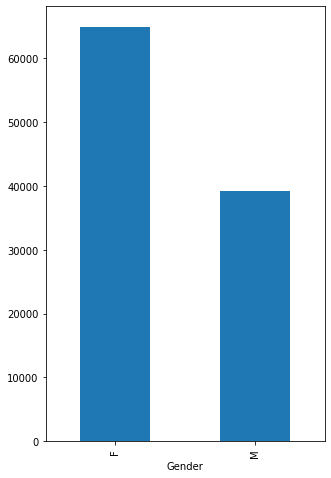

In [7]:
df.groupby('Gender')['Name'].nunique().plot(kind='bar', figsize=(5, 8))
plt.show()

From the diagram above, we can see that the dataset has female data nearly two times bigger than male

## Categorizing name is it male or female

In [8]:
diff = sex.reset_index().pivot('Name', 'Gender', 'Count')
diff = diff.fillna(0)
diff['Mpercent'] = ((diff['M'] - diff['F']) / (diff['M'] + diff['F']))
diff['gender'] = np.where(diff['Mpercent'] > 0.001, 'male', 'female')
diff.head()

Gender,F,M,Mpercent,gender
Name,,,,
Aaban,0.0,72.0,1.0,male
Aabha,21.0,0.0,-1.0,female
Aabid,0.0,5.0,1.0,male
Aabriella,10.0,0.0,-1.0,female
Aadam,0.0,196.0,1.0,male


## Break down the strings of names into bigram blocks of characters with CountVectorizer

In [9]:
char_vector = CountVectorizer(analyzer='char', ngram_range=(2,2))
x = char_vector.fit_transform(diff.index)
x = x.tocsc()
y = (diff.gender == 'male').values.astype(np.int)

## Split data into train and test

In [10]:
gend_train, gend_test = train_test_split(range(diff.shape[0]), train_size=0.8)
mask = np.ones(diff.shape[0], dtype='int')
mask[gend_train] = 1
mask[gend_test] = 0
mask = (mask == 1)

## Train the model

In [11]:
x_train = x[mask]
y_train = y[mask]
x_test = x[~mask]
y_test = y[~mask]

nbs = MultinomialNB(alpha=1)
nbs.fit(x_train, y_train)
train_accuracy = nbs.score(x_train, y_train)
test_accuracy = nbs.score(x_test, y_test)

print(train_accuracy)
print(test_accuracy)

0.7423413348244599
0.7349025455320055


## Function for lookup

In [12]:
 def checker(names):
     str(names)
     new = char_vector.transform([names])
     y_pred = nbs.predict(new)
     if(y_pred == 1):
         print('Nama ini cocok untuk cowok!')
     else:
        print('Nama ini cocok untuk cewek!')

In [13]:
checker('Gabriella')

Nama ini cocok untuk cewek!


In [14]:
checker('John')

Nama ini cocok untuk cowok!


In [15]:
checker('Sansa')

Nama ini cocok untuk cewek!


In [16]:
checker('Snow')

Nama ini cocok untuk cowok!


This is rewritten from this notebook [link](https://www.kaggle.com/springboardroger/naive-bayes-name-gender-classifier)